In [1]:
import pandas as pd
import numpy as np
import seaborn as sp
import matplotlib.pyplot as plt
%matplotlib inline
import time
import warnings
warnings.filterwarnings('ignore')

In [49]:
train= pd.read_csv("train.csv")
test= pd.read_csv ("test.csv")

## Exploratory Data Analysis (EDA) ###

In [3]:
print("Column list with missing values in train:" ,train.columns[train.isna().sum() > 0])
print("Column list with missing values in test:" ,test.columns[test.isna().sum() > 0])

Column list with missing values in train: Index([], dtype='object')
Column list with missing values in test: Index([], dtype='object')


In [4]:
print("Column list with missing values in train:" ,train.columns[train.isna().sum() > 0])
print("Column list with missing values in test:" ,test.columns[test.isna().sum() > 0])

Column list with missing values in train: Index([], dtype='object')
Column list with missing values in test: Index([], dtype='object')


In [5]:
# Check if we have enough information for each entry
train.label.value_counts() 

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [6]:
X_train = train.drop("label", axis=1)
y_train = train.label

In [7]:
print("Minimum  %d and maximum %d  values avaible in each pixel" %(train.min().min(),train.max().max()))

Minimum  0 and maximum 255  values avaible in each pixel


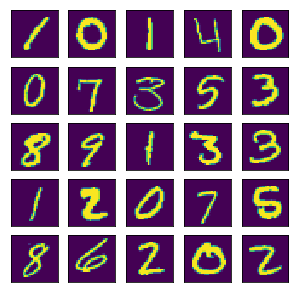

In [8]:
# Plot the data by converting it to 28x28 matrix
plt.figure(figsize=(5,5))
for digit_num in range(0,25):
    plt.subplot(5,5,digit_num+1)
    grid_data = X_train.iloc[digit_num].as_matrix().reshape(28,28)  # reshape from 1d to 2d pixel array
    plt.imshow(grid_data, interpolation = "none")
    plt.xticks([])
    plt.yticks([])

In [38]:
# Create a simple model to classification.
from sklearn.linear_model import LogisticRegression
start = time. time()
logreg = LogisticRegression()
logreg.fit(X_train[0:1000], y_train[0:1000])
end = time. time()
print('Accuracy of Logistic regression classifier on training set: {:.2f}  TimeTaken: {:.2f} secs'
      .format(logreg.score(X_train[0:1000], y_train[0:1000]),end - start ))

Accuracy of Logistic regression classifier on training set: 1.00  TimeTaken: 0.57 secs


### Lets try to apply PCA on this to reduce the varibale count.

In [10]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [11]:
#Doing the PCA on the train data
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

Text(0,0.5,'PC2')

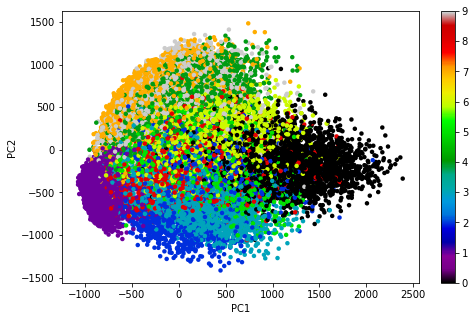

In [12]:
transform = pca.transform(X_train)

plt.figure(figsize=(8,5))
plt.scatter(transform[:,0],transform[:,1], s=20, c = y_train, cmap = "nipy_spectral", edgecolor = "None")
plt.colorbar()
plt.clim(0,9)

plt.xlabel("PC1")
plt.ylabel("PC2")

We can see that PCA has seperated the lables into visible clusters. This is with only 2 PCA vectors. Lets try and see how many PCAs are required to explain the varience.

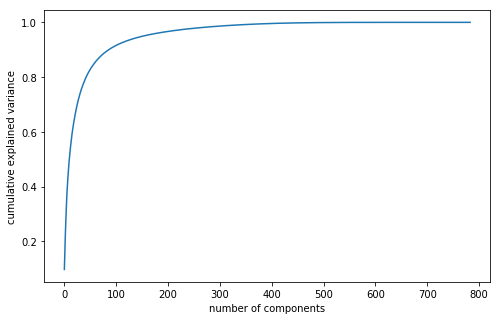

In [13]:
#Making the screeplot - plotting the cumulative variance against the number of components
fig = plt.figure(figsize = (8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

# looks like 100 variables are able to addess 90% of variaance while 200 is able to address 97% of variance.

In [33]:
logreg = LogisticRegression()
n_components_array=([1,2,3,4,5,10,20,50,100,120,200,500])
score_array = np.zeros(len(n_components_array))
i=0

for n_components in n_components_array:
    pca = PCA(n_components=n_components)
    pca.fit(X_train)
    df_train_pca = pca.transform(X_train.iloc[0:1000])
    logreg.fit(df_train_pca[0:1000], y_train[0:1000])
    score_array[i] = logreg.score(df_train_pca[0:1000], y_train[0:1000])
    i=i+1

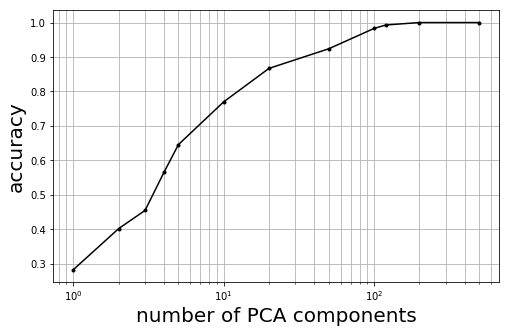

In [34]:
fig = plt.figure(figsize = (8,5))
plt.plot(n_components_array,score_array,'k.-')
plt.xscale('log')
plt.xlabel("number of PCA components", size=20)
plt.ylabel("accuracy", size=20)
plt.grid(which="both")

120 variables are able to explain almost all the variance in data with respect to logical regression.

In [46]:
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=120)
df_train_pca = pca_final.fit_transform(X_train)
df_test_pca = pca_final.transform(test)

(28000, 120)

In [40]:
# Create a simple model to classification.
logreg = LogisticRegression()
logreg.fit(df_train_pca, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [47]:
results=logreg.predict(df_test_pca)

In [74]:
Submission = pd.DataFrame(columns=['ImageId', 'Label'])
Submission["Label"]= results
Submission["ImageId"]= Submission.index+1

In [77]:
Submission.to_csv("New_Result.csv",index=False)